In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import openpyxl
import xlsxwriter
import statsmodels.api as sm


current_path = os.getcwd()
print(current_path)

C:\Users\lbv06


In [85]:
# importing data and only keeping the last row of data

xls = pd.ExcelFile(r'd:\usuarios\lbv06\Downloads\I2A_30min_60min_AII_AR_HRP_1.xls')
xls.sheet_names

cols = ['SMF', 'CTR', 'neg. SMF', 'neg. CTR']

df30 = pd.read_excel(xls, sheet_name="30min", usecols=cols)
#df30 = df30.iloc[270:278, :]

df60 = pd.read_excel(xls, sheet_name="60min", usecols=cols)
#df60 = df60.iloc[270:278, :]

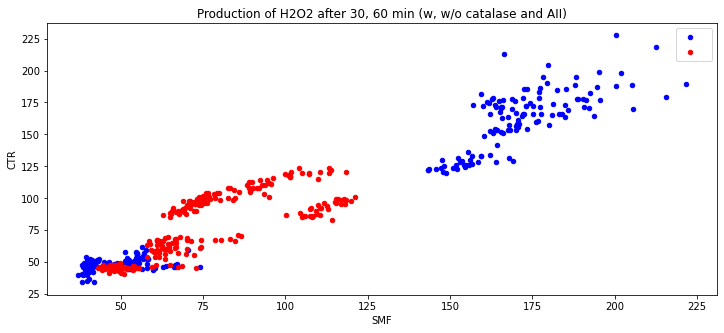

In [86]:
# plot SMF and CTR from the last row of data

#a, b = np.polyfit(df30['SMF'], df30['CTR'], 1)
#c, d = np.polyfit(df60['SMF'], df60['CTR'], 1)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

df30.plot.scatter(ax=axes, x='SMF', y='CTR', c='b')
#axes.plot(df30['SMF'], a*df30['SMF']+b, color='b')
df60.plot.scatter(ax=axes, x='SMF', y='CTR', c='r')
#axes.plot(df60['SMF'], c*df60['SMF']+d, color='r')

axes.set_title('Production of H2O2 after 30, 60 min (w, w/o catalase and AII)')
axes.legend(['', '', '30 min', '60 min'])

#print("30 min: CTR = ", a, "x SMF + ", b)
#print("60 min: CTR = ", c, "x SMF + ", d)

#axes = sns.regplot(x=df30['SMF'], y=df30['CTR'], color="g", ci=None)
#axes = sns.regplot(x=df60['SMF'], y=df60['CTR'], color="b", ci=None)

[None]

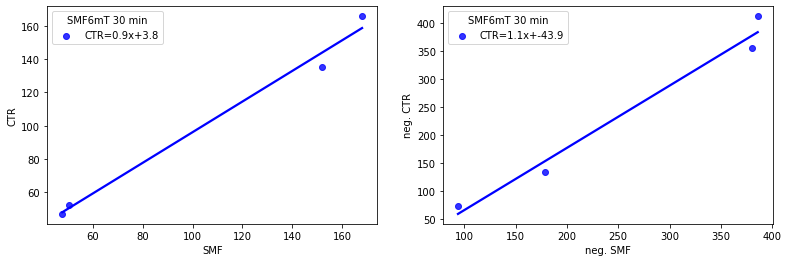

In [87]:
# averaging data presented above for 30 min, and can be done for 60 min too


i = 0
df = pd.DataFrame(columns=cols, index=range(0))
while i < 8:
    mean = df30.iloc[[i, i+1]].mean(axis=0)
    list = [mean[0], mean[1], mean[2], mean[3]]
    df = df.append(pd.DataFrame([list], columns=cols), ignore_index=True)
    i=i+2

#print("30 min: CTR = ", a, "x SMF + ", b)
#print("30 min: neg. CTR = ", c, "x SMF + ", d)

slope1, intercept1, r_value1, pv1, se1 = stats.linregress(df['SMF'],df['CTR'])
slope2, intercept2, r_value2, pv2, se2 = stats.linregress(df['neg. SMF'],df['neg. CTR'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))
sns.regplot(ax = axes[0], x=df['SMF'], y=df['CTR'], color="b", ci=None,
            label="CTR={0:.1f}x+{1:.1f}".format(slope1, intercept1)).legend(loc="best").set(title='SMF6mT 30 min')
sns.regplot(ax = axes[1], x=df['neg. SMF'], y=df['neg. CTR'], color="b", ci=None,
            label="CTR={0:.1f}x+{1:.1f}".format(slope2, intercept2)).legend(loc="best").set(title='SMF6mT 30 min')


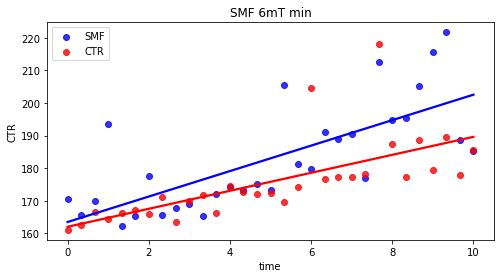

3.9095516129032277
2.7608830645161295


In [130]:
# time dependency

SMF = []
CTR = []

for i in range(0, 278, 9):
    listB = df30['SMF'].tolist()[i]
    SMF.append(listB)

    
for i in range(0, 278, 9):
    listC = df30['CTR'].tolist()[i]
    CTR.append(listC)

time = (np.arange(0, 31)*20)/60
data = {'SMF': SMF, 'CTR': CTR, 'time': time}
df = pd.DataFrame(data)

#writer = pd.ExcelWriter(r'd:\usuarios\lbv06\Downloads\testtest.xls', engine = 'xlsxwriter')
#df.to_excel(writer, sheet_name = 'data')
#writer.save()
#writer.close()

                    
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
sns.regplot(ax = axes, x=df['time'], y=df['SMF'], color="b", ci=None, label="SMF").set(title='SMF 6mT min')
sns.regplot(ax = axes, x=df['time'], y=df['CTR'], color="r", label="CTR", ci=None)
axes.legend()
plt.show()

i = 0
while i < 2:
    slope, intercept, r_value, pv, se = stats.linregress(df['time'],df.iloc[:, i])
    print(slope)
    i = i+1